7TH

In [8]:
#Print all the columns where the name of students begin with letter A and percentage is higher than 85 using “ index”  attribute .

import pandas as pd
import numpy as np
df = pd.DataFrame({'Name':['Rima','Alok','Anandita','Priyanka'],
                     'Age':[21,19,20,18],
                        'Percentage':[58,92,85,30]})
#df.set_index('Name',inplace=True)
df

,Name,Age,Percentage
0,Rima,21,58
1,Alok,19,92
2,Anandita,20,85
3,Priyanka,18,30


In [9]:
#Print all the columns where the name of students begin with letter A and percentage is higher than 85 using “ index”  attribute.
df.loc[(df['Name'].str.startswith('A')) & (df['Percentage']>85)]

,Name,Age,Percentage
1,Alok,19,92


In [7]:
#Print Age column “loc”  function. Print average age. 
df.loc[:,'Age']


Name
Rima        21
Alok        19
Anandita    20
Priyanka    18
Name: Age, dtype: int64

In [8]:
#Print 0th and 2nd index column using “iloc” function.
df.iloc[[0,2]]

,Age,Percentage
Name,,
Rima,21,58
Anandita,20,85


In [9]:
#Update the Percentage column between 0 and 1.
df['Percentage']=df['Percentage']/100
df

,Age,Percentage
Name,,
Rima,21,0.58
Alok,19,0.92
Anandita,20,0.85
Priyanka,18,0.30


In [2]:
#3.	Create charts for below dataset.
import pandas as pd
import numpy as np
import matplotlib as plt
df = pd.DataFrame({'Name':['John','Mary','Peter','jeff','bill','lisa','jose'],
                        'Age':[23,78,22,19,45,33,20],
                        'Gender':['M','F','M','M','M','F','M'],
                        'State':['California','DC','California','DC','California','Texas','Texas'],
                        'Num_children':[2,0,0,3,2,1,4],
                        'Num_pets':[5,1,0,5,2,2,3]})
df

,Name,Age,Gender,State,Num_children,Num_pets
0,John,23,M,California,2,5
1,Mary,78,F,DC,0,1
2,Peter,22,M,California,0,0
3,jeff,19,M,DC,3,5
4,bill,45,M,California,2,2
5,lisa,33,F,Texas,1,2
6,jose,20,M,Texas,4,3


<AxesSubplot:xlabel='Num_children', ylabel='Num_pets'>

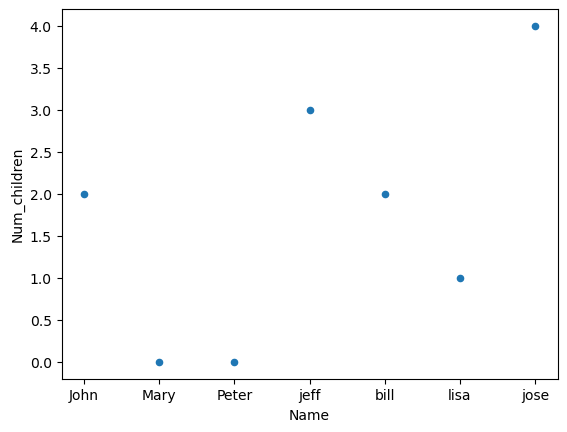

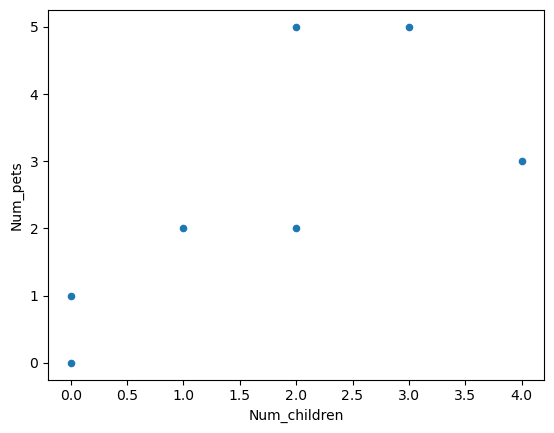

In [3]:
#Scatter plot of two columns – name and num_children ,num_children and num_pets 
df.plot(kind='scatter',x='Name',y='Num_children')
df.plot.scatter(x='Num_children',y='Num_pets')


<AxesSubplot:xlabel='Name'>

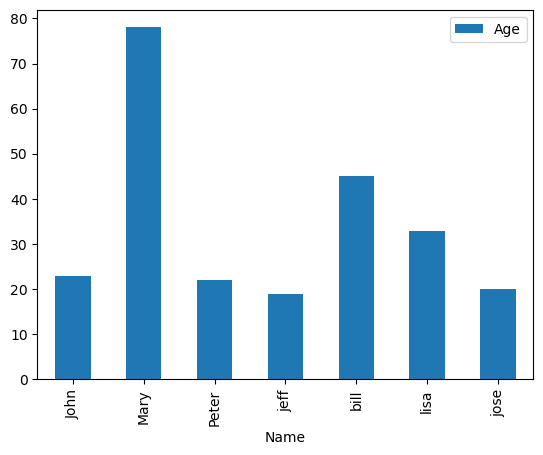

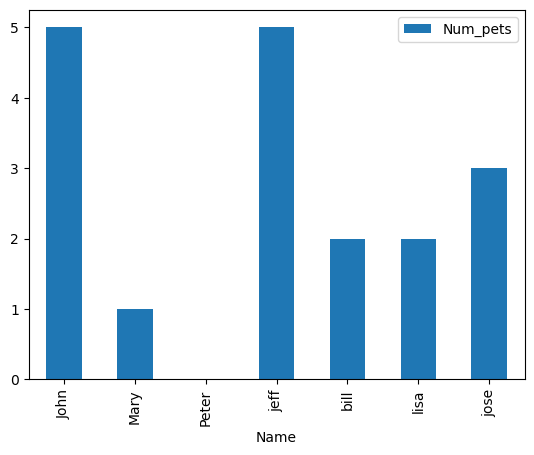

In [6]:
#Bar plot of column values – name and age, between any other two columns of your choice.
df.plot.bar(x='Name',y='Age')
df.plot.bar(x='Name',y='Num_pets')

<AxesSubplot:xlabel='Name'>

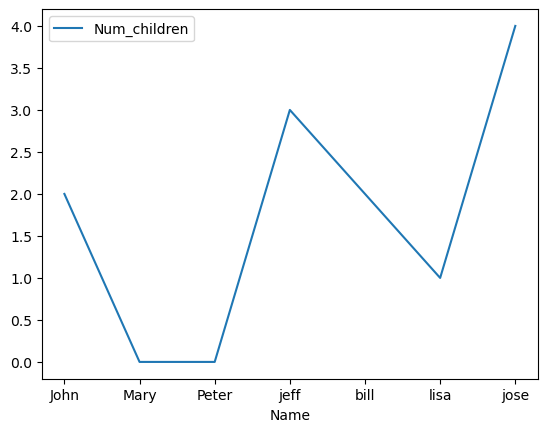

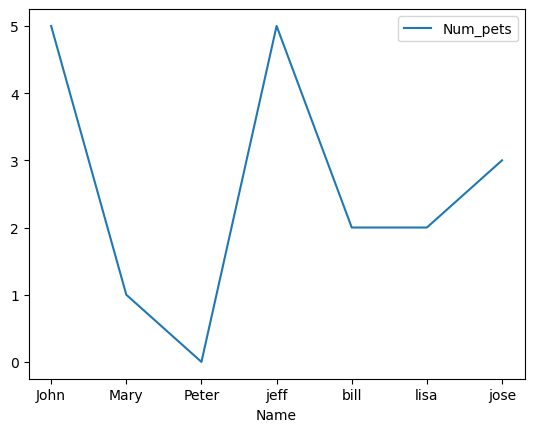

In [7]:
#Line plot, multiple columns – name and num_children, num_pets
df.plot.line(x='Name',y='Num_children')
df.plot.line(x='Name',y='Num_pets')

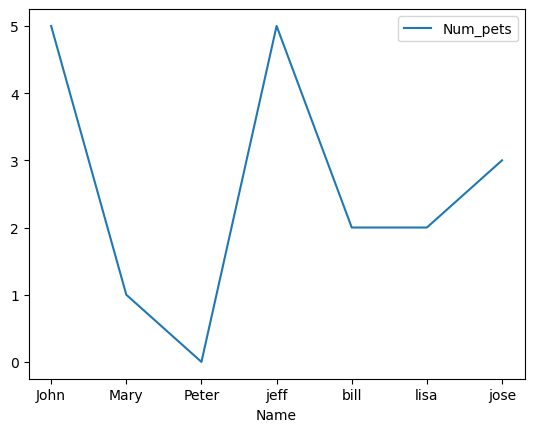

In [8]:
#Save plot to file 
df.plot.line(x='Name',y='Num_pets').get_figure().savefig('line.png')

<AxesSubplot:xlabel='State'>

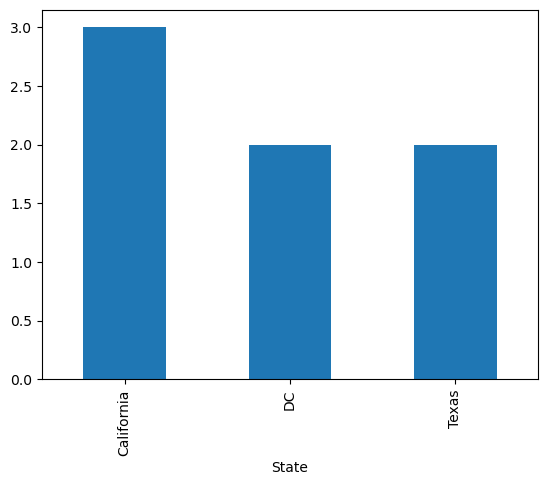

In [9]:
#Bar plot with group by – Number of unique names per state
df.groupby('State')['Name'].nunique().plot.bar()

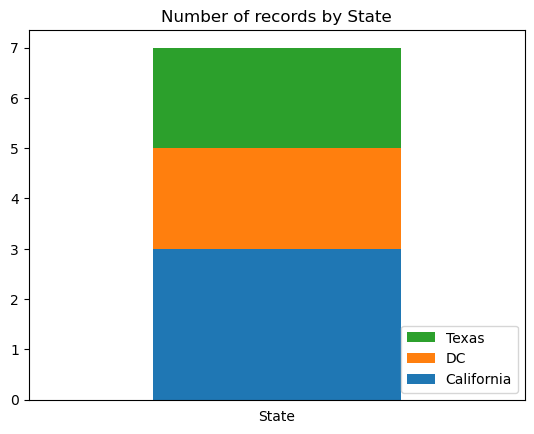

In [22]:
#Stacked bar plot with group by – hint –Learn concept of dummy variables 

import matplotlib.pyplot as plt

df.assign(dummy = 1).groupby(
  ['dummy','State']
).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=False)
plt.title('Number of records by State') 
plt.xlabel('State')
plt.xticks([])
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)
labels = reversed(df['State'].unique())
plt.legend(reversed_handles,labels,loc='lower right')
plt.show()

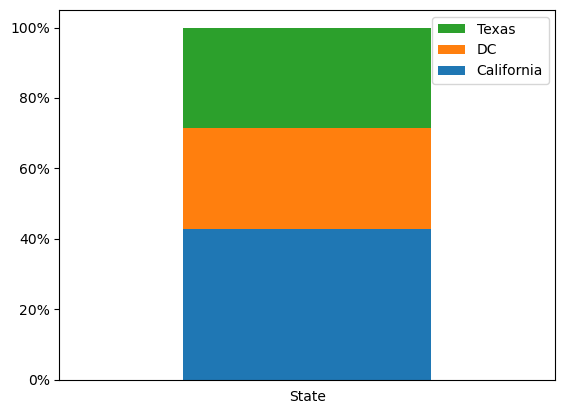

In [27]:
#Stacked bar plot with group by, normalized to 100%

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

df.assign(dummy = 1).groupby(
  ['dummy','State']
).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).to_frame().unstack().plot(kind='bar',stacked=True,legend=False)
plt.xlabel('State')
plt.xticks([])
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)
correct_labels = reversed(df['State'].unique())
plt.legend(reversed_handles,correct_labels)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

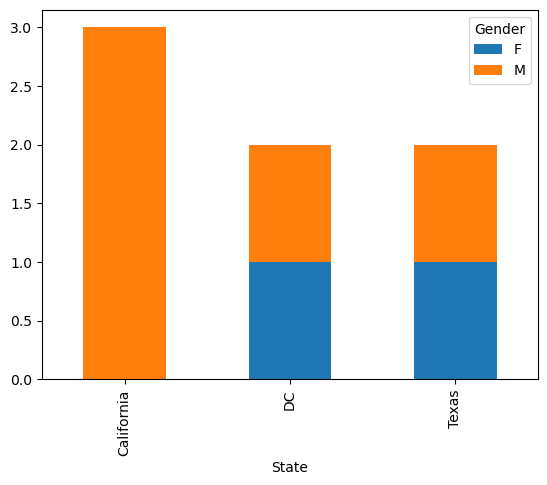

In [29]:
#Stacked bar plot, two-level group by -  Stacked bar chart showing the number of peopleper state, split into males and females

import matplotlib.pyplot as plt
import pandas as pd

df.groupby(['State','Gender']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

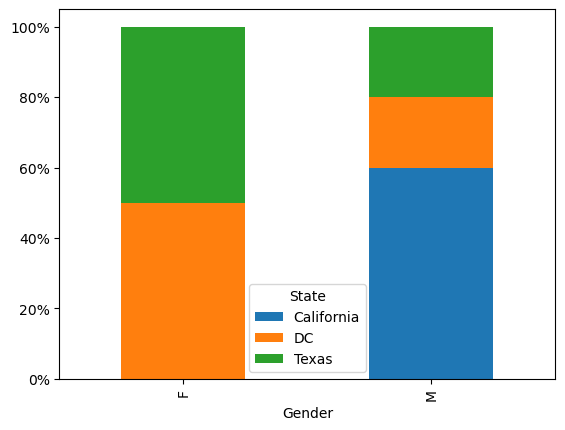

In [30]:
#Stacked bar plot with two-level group by, normalized to 100%  - Count grouped by state and gender, with normalized columnsso that each sums up to 100%

import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

df.groupby(['Gender','State']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()